### Nguyễn Hùng Anh
### 21064051

### Thư viện sử dụng

In [31]:

import numpy as np
import os
import matplotlib.pyplot as plt 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import cv2
from sklearn import preprocessing
from pathlib import Path
import tensorflow

In [12]:
#Mảng lưu trữ nhãn huấn luyện, kiểm tra
labels_train = []
labels_test = []

#Mảng lưu trữ tập huấn luyên, kiểm tra
data_train = []
data_test = []

#Đường dẫn thư mực dataset
train_path = "../deep_learning/dataset/fruit/train_zip/train"
test_path = "../deep_learning/dataset/fruit/test_zip/test"



In [13]:
#Thực hiện thu thập dữ liệu từ dataset

for filename in os.listdir(train_path):
    if(filename.split('.')[1]=="jpg"): #Chỉ lấy ảnh jpg
        labels_train.append(filename.split('_')[0]) #append vào nhãn
        data_train.append(os.path.join(train_path, filename)) #append vào data

for filename in os.listdir(test_path):
    if(filename.split('.')[1]=="jpg"): #Chỉ lấy ảnh jpg
        labels_test.append(filename.split('_')[0])#append vào nhãn
        data_test.append(os.path.join(test_path, filename))  #append vào data

In [17]:
#In ra kích thước nhãn, dữ liệu của huấn luyện và kiểm tra
print(f"Kích thước nhãn huấn luyện: {len(labels_train)}")
print(f"Kích thước nhãn kiểm tra: {len(labels_test)}")
print(f"Kích thước dữ liệu huấn luyện: {len(data_train)}")
print(f"Kích thước dữ liệu kiểm tra: {len(data_test)}")


Kích thước nhãn huấn luyện: 240
Kích thước nhãn kiểm tra: 60
Kích thước dữ liệu huấn luyện: 240
Kích thước dữ liệu kiểm tra: 60


In [20]:
#Lấy danh sách các nhãn duy nhất 
label_train_unique = np.unique(labels_train)
label_test_unique = np.unique(labels_test)


In [22]:
print("Unique labels for train are: ", label_train_unique)
print("Number of jpg images in train are: ", len(data_train))

print("\nUnique labels are for test are: ", label_test_unique)
print("Number of jpg images for train are: ", len(data_test))

Unique labels for train are:  ['apple' 'banana' 'mixed' 'orange']
Number of jpg images in train are:  240

Unique labels are for test are:  ['apple' 'banana' 'mixed' 'orange']
Number of jpg images for train are:  60


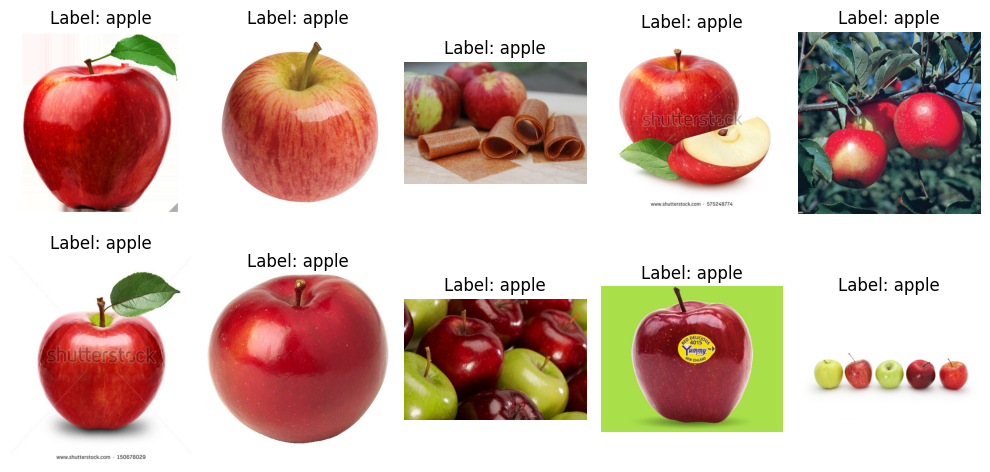

In [24]:
# Hiển thị 5 ảnh đầu tiên từ tập huấn luyện
plt.figure(figsize=(10, 5))
for i in range(5):
    image = cv2.imread(data_train[i])
    rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.subplot(2, 5, i + 1)  # Hàng 1, cột 5
    plt.imshow(rgb_img)
    plt.title(f"Label: {labels_train[i]}")
    plt.axis('off')

# Hiển thị 5 ảnh từ hàng thứ hai của tập kiểm tra (index 5 đến 9)
for i in range(5):
    image = cv2.imread(data_test[i + 5])  # Bắt đầu từ index 5
    rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.subplot(2, 5, i + 6)  # Hàng 2, cột 5
    plt.imshow(rgb_img)
    plt.title(f"Label: {labels_test[i + 5]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [26]:
# Chuyển đổi dữ liệu ảnh thành mảng NumPy
def load_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path)  # Đọc ảnh
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển sang RGB
        img = cv2.resize(img, (50,50))
        images.append(img)
    return np.array(images)  # Chuyển danh sách thành mảng NumPy

# Chuyển đổi dữ liệu
X_train = load_images(data_train)  # Mảng ảnh tập huấn luyện
y_train = np.array(labels_train)   # Mảng nhãn tập huấn luyện

X_test = load_images(data_test)    # Mảng ảnh tập kiểm tra
y_test = np.array(labels_test)     # Mảng nhãn tập kiểm tra

In [27]:
# Kiểm tra kích thước dữ liệu
print(f"Kích thước X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Kích thước X_test: {X_test.shape}, y_test: {y_test.shape}")

Kích thước X_train: (240, 50, 50, 3), y_train: (240,)
Kích thước X_test: (60, 50, 50, 3), y_test: (60,)


In [28]:
fruits = {}
for i in range(len(label_train_unique)):
    fruits[label_train_unique[i]] = i
    
fruits

{'apple': 0, 'banana': 1, 'mixed': 2, 'orange': 3}

In [29]:
temp_train = []
temp_test = []


for label in labels_train:
    temp_train.append(fruits.get(label))

for label in labels_test:
    temp_test.append(fruits.get(label))

print("Length of train data: ", len(temp_train))
print("Length of test data: ", len(temp_test))

Length of train data:  240
Length of test data:  60


In [32]:
y_train = tensorflow.keras.utils.to_categorical(temp_train, 4)
y_test = tensorflow.keras.utils.to_categorical(temp_test, 4)

Length of X_train:  240


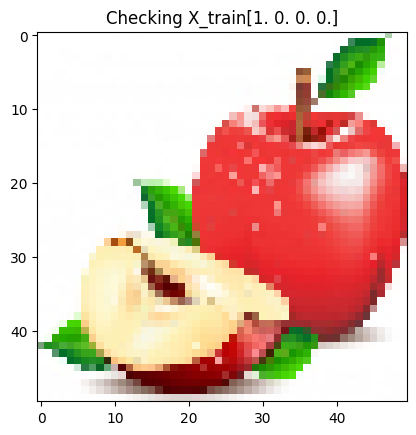

In [33]:
print("Length of X_train: ", len(X_train))
plt.imshow(X_train[34])
plt.title("Checking X_train"+str(y_train[58]))
plt.show()

In [35]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

X_train = X_train / 255.0
X_test = X_test / 255.0

In [36]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

print("\ny_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (240, 50, 50, 3)
X_test shape:  (60, 50, 50, 3)

y_train shape:  (240, 4)
y_test shape:  (60, 4)


In [60]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    MaxPooling2D(pool_size=(4,4)),
    Dropout(rate=0.4),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(4,4)),
    Dropout(rate=0.4),
    
    Flatten(),
    
    Dense(256, activation='relu'),
    Dropout(rate=0.6),

    Dense(4, activation='softmax') 
])

C:\Users\hung0\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,212 (336.77 KB)

 Trainable params: 86,212 (336.77 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_split = 0.2, shuffle = True)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.2982 - loss: 1.5820 - val_accuracy: 0.0000e+00 - val_loss: 1.6520
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4328 - loss: 1.2451 - val_accuracy: 0.0000e+00 - val_loss: 1.5089
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3992 - loss: 1.2333 - val_accuracy: 0.0000e+00 - val_loss: 1.4709
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4806 - loss: 1.2284 - val_accuracy: 0.0000e+00 - val_loss: 1.4932
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5898 - loss: 1.1277 - val_accuracy: 0.0000e+00 - val_loss: 1.5421
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5862 - loss: 1.1179 - val_accuracy: 0.0000e+00 - val_loss: 1.5826
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6960 - loss: 1.0089 - val_accuracy: 0.0000e+00 - val_loss: 1.5583
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6792 - loss: 0.9650 - val_

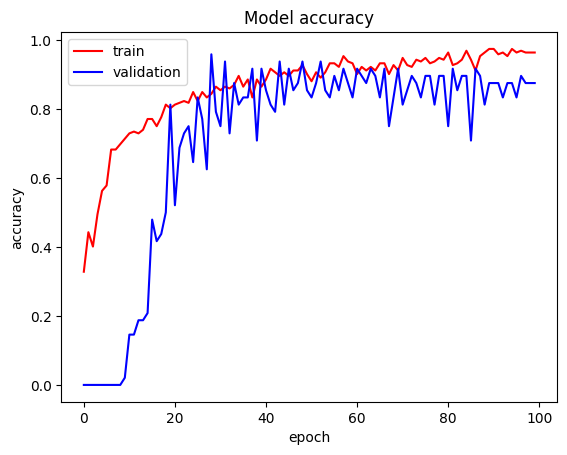

In [64]:
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

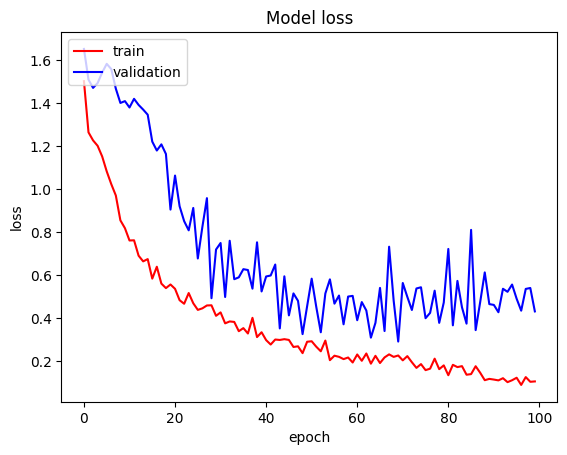

In [65]:
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [67]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss achieved:', loss)
print('Test accuracy achieved:', accuracy*100)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9021 - loss: 0.4408
Test loss achieved: 0.4757634401321411
Test accuracy achieved: 89.99999761581421


In [68]:
pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


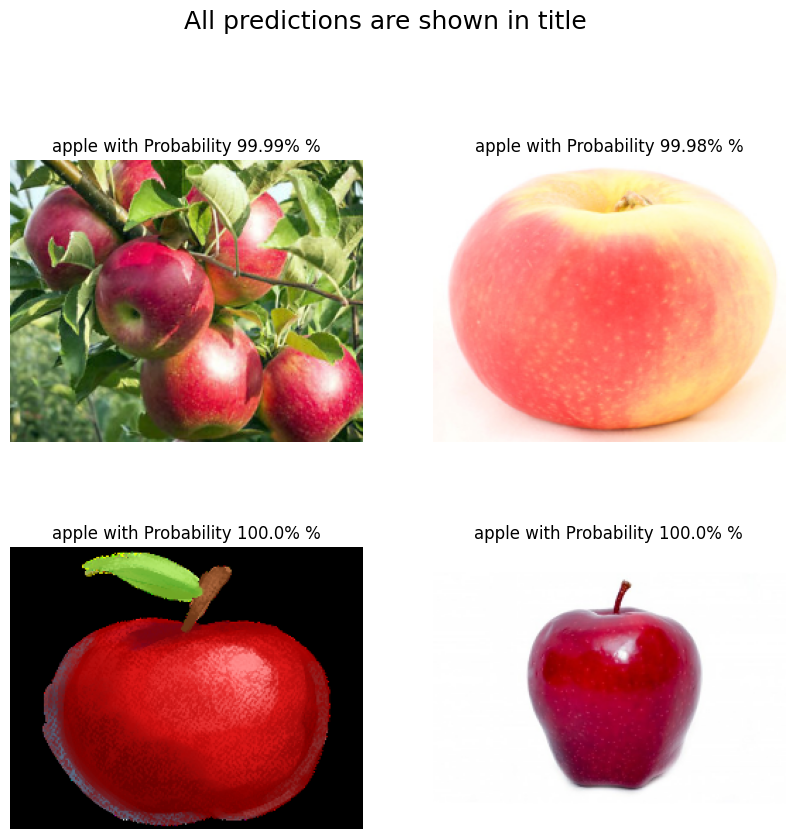

In [70]:
fig, axs= plt.subplots(2,2, figsize=[10,10])
fig.subplots_adjust(hspace=.01)


count=0
for i in range(2):    
    for j in range(2):  
        img = cv2.imread(data_test[count])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        img = cv2.resize(img, (250,200))
        result = np.argsort(pred[count])[::-1]
        i_max = -1
        max_val = ""
        for (k,val) in enumerate(fruits.keys()):
            if(pred[count][k] > i_max):
                i_max = pred[count][k]
                max_val = val
        txt = str(max_val) + " with Probability "+ str("{:.4}%".format(i_max*100)) + " %"
        axs[i][j].imshow(img)
        axs[i][j].set_title(txt)
        axs[i][j].axis('off')
        count+=1
        
plt.suptitle("All predictions are shown in title", fontsize = 18)        
plt.show()